<a href="https://colab.research.google.com/github/FelipeFerAl/ControlNoLineal/blob/main/Clases/Ejercicio2CNL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Con solve_ivp y ciclos

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def system(zeta1, zeta2, p=1):
  dzeta1 = zeta2
  dzeta2 = p*(zeta2-zeta2**3)-zeta1
  return dzeta1, dzeta2

# Phase space limits
theta_min, theta_max = -2, 2
omega_min, omega_max = -4, 4

# Grid
theta = np.linspace(theta_min, theta_max, 600)
omega = np.linspace(omega_min, omega_max, 400)
THETA, OMEGA = np.meshgrid(theta, omega)

# Vector field
dTHETA, dOMEGA = system(THETA, OMEGA)
dTHETA2, dOMEGA2 = system(THETA, OMEGA)

In [5]:
t_span = (0, 40)
t_eval = np.linspace(*t_span, 4000)

theta0_vals = np.linspace(-2, 2, 15)
omega0_vals = np.linspace(-3, 3, 9)

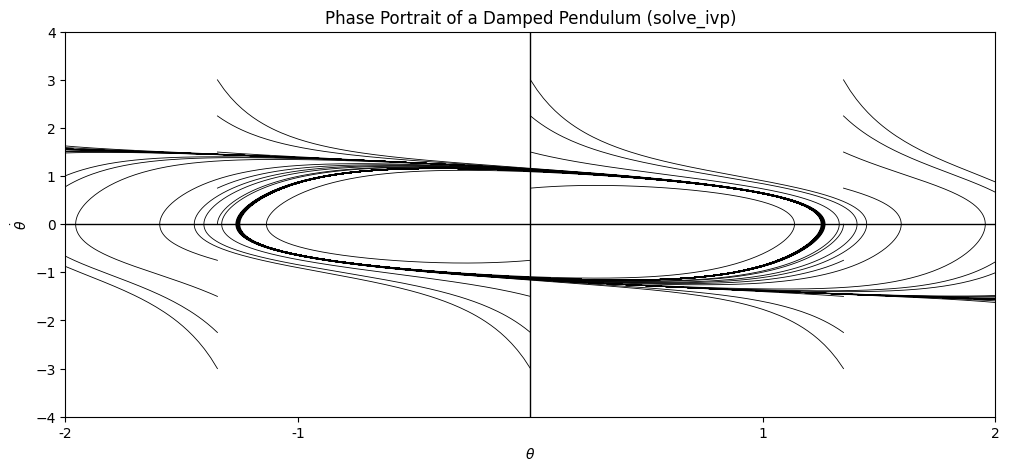

In [9]:
def system_ivp(t, y, p=1):
  zeta1, zeta2 = y
  dzeta1 = zeta2
  dzeta2 = p*(zeta2 - zeta2**3) - zeta1
  return [dzeta1, dzeta2]

t_span = (0, 40)
t_eval = np.linspace(*t_span, 4000)

theta0_vals = np.linspace(-3*np.pi, 3*np.pi, 15)
omega0_vals = np.linspace(-3, 3, 9)

plt.figure(figsize=(12, 5))

for theta0 in theta0_vals:
  for omega0 in omega0_vals:
    sol = solve_ivp(
      system_ivp,
      t_span,
      [theta0, omega0],
      t_eval=t_eval,
      rtol=1e-8,
      atol=1e-10
    )
    plt.plot(sol.y[0], sol.y[1], 'k', linewidth=0.6)

# Axes
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)

# Ticks
ticks = [-2, -1, 1, 2]
labels = [r"-2", r"-1", r"1", r"2"]
plt.xticks(ticks, labels)

plt.xlabel(r"$\theta$")
plt.ylabel(r"$\dot{\theta}$")
plt.title("Phase Portrait of a Damped Pendulum (solve_ivp)")

plt.xlim(-2, 2)
plt.ylim(-4, 4)

plt.show()

## Con streamplot

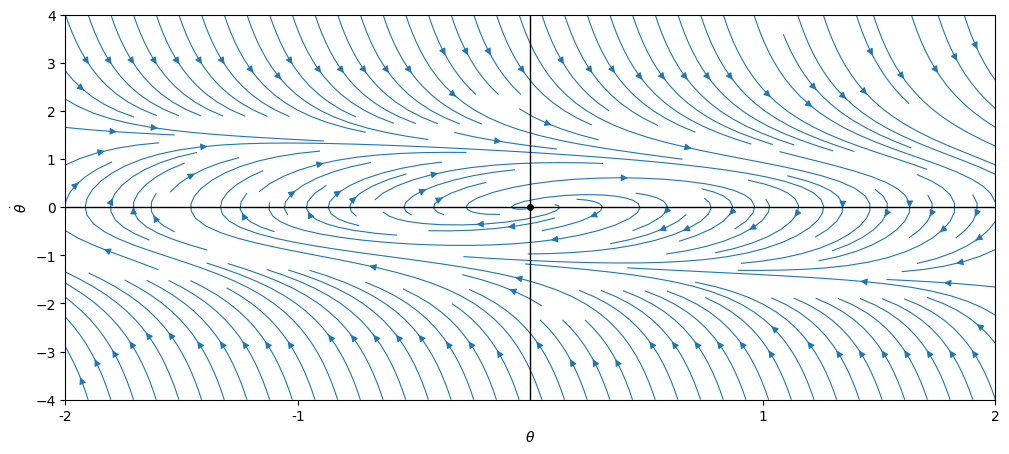

In [3]:
plt.figure(figsize=(12, 5))

plt.streamplot(
    THETA, OMEGA,
    dTHETA2, dOMEGA2,
    density=1.4,
    linewidth=0.8,
    arrowsize=1
)

# Axes
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)

# Ticks at multiples of π
ticks = [-2, -1, 1, 2]
labels = [r"-2", r"-1", r"1", r"2"]

plt.xticks(ticks, labels)

plt.xlabel(r"$\theta$")
plt.ylabel(r"$\dot{\theta}$")

plt.xlim(theta_min, theta_max)
plt.ylim(omega_min, omega_max)

for k in range(-3, 4):
  plt.plot(2*k*np.pi, 0, 'ko', markersize=4)

plt.grid(False)
plt.show()

## Con solve_ivp y condiciones iniciales

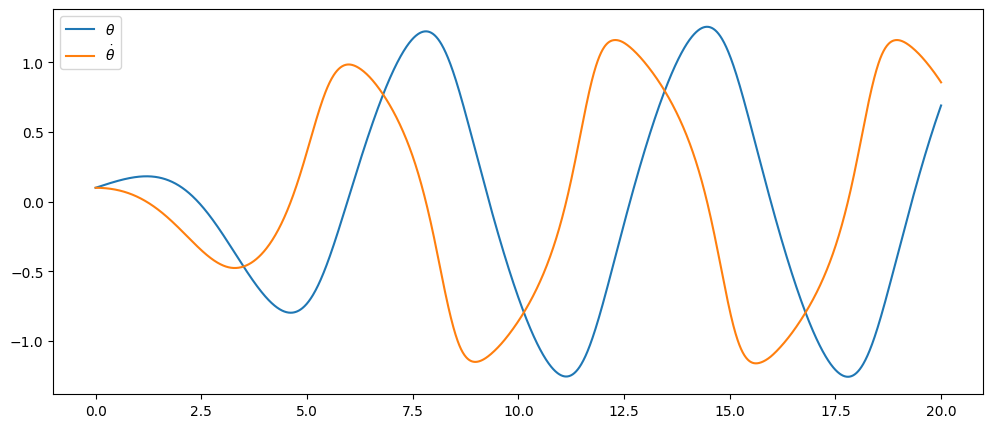

In [27]:
def RayleighOsc(t, z, p):
  z1, z2 = z
  dz1 = z2
  dz2 = p*(z2-z2**3)-z1
  return [dz1, dz2]

sol = solve_ivp(RayleighOsc, [0,20], [0.1, 0.1], args=(1,), dense_output=True)

tplot = np.linspace(0, 20, 2000)
zplot = sol.sol(tplot)

plt.figure(figsize=(12,5))
plt.plot(tplot, zplot[0], label=r'$\theta$')
plt.plot(tplot, zplot[1], label=r'$\dot{\theta}$')
plt.legend()
plt.show()

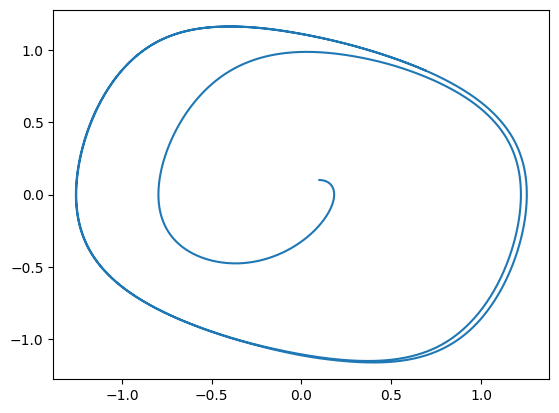

In [28]:
plt.plot(zplot[0], zplot[1])
plt.show()

## Diagrama de fase en base a ecuaciones

In [30]:
# Define matrix A
A = np.array([[-3, 4], [-2, 3]])

# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(A)

print("Matrix A:")
print(A)
print("\nEigenvalues:")
print(eigenvalues)
print("\nEigenvectors (columns):")
print(eigenvectors)

Matrix A:
[[-3  4]
 [-2  3]]

Eigenvalues:
[-1.  1.]

Eigenvectors (columns):
[[-0.89442719 -0.70710678]
 [-0.4472136  -0.70710678]]
